In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
%load_ext autoreload
%autoreload 2
%run '../../main.py'


from lib.helper import Functions
from lib.store.influxstore import InfluxStore

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2018, 2018)
dataSetOps.prepareMin()

df = dataSetOps.df

df = df.head(30000)


In [4]:
def integ_calc(arr):
    begin = arr[0]
    td = len(arr)
    end = arr[td-1]
    
    s = 0
    for i in range(0, td):
        cp = begin + ((end - begin) * i / td)
        incp = arr[i] - cp
        s = s + incp
    return s

levels = [3, 2, 1, 0.5, 0.3, 0.2, 0.1, 0.05]

allowed_windowes = [10, 20, 30, 40, 50, 70, 100]
i = allowed_windowes[0]
integList = [0] * len(df)
integRoList = [0] * len(df)
for minLevel in levels:
    print('level:', minLevel)
    i = allowed_windowes[0]
    while i < len(df) - 1:
        maxs = 0;
        maxro = 0
        maxws = 0
        for ws in allowed_windowes:
            begin = int(i - ws/2)
            end = int(i + ws/2)
            if (begin < 0) or (end > len(df) - 1):
                continue

            s = integ_calc(df.iloc[begin:end]['price'].values)
            ro = s
            if abs(ro) * 10 < minLevel:
                continue
            if abs(ro) > maxro:
                maxs = s
                maxro = ro
                maxws = ws
        begin = int(i - maxws/2)
        end = int(i + maxws/2)

        if (begin < 0) or (end > len(df) - 1):
            continue
        if maxro == 0:
            i = i + allowed_windowes[0]
            continue

        print(i, maxs, maxws)
        for j in range(begin, end):
    #         print(j)
            if integList[j] != 0:
                break;
            integList[j] = maxs
            integRoList[j] = maxro
        i = end
df['integral'] = integList
df['integralRo'] = integRoList
df['integralRo'] = df['integralRo'] * 10

level: 3
25420 0.348615000000003 70
25745 -0.33012999999999937 100
level: 2
9340 -0.22865499999999717 100
10890 -0.20320000000000804 100
12170 0.2049350000000023 100
20090 -0.20889499999999117 100
25350 -0.2714000000000045 100
25410 0.2725150000000025 100
25670 0.21238000000000534 100
25730 -0.22552999999999157 100
level: 1
3910 0.11590499999999948 100
5200 -0.12311999999999967 100
5300 -0.17521999999999904 100
9330 -0.10629499999999736 100
9400 0.10198999999999869 50
9425 0.18057000000000123 100
9475 0.1428350000000005 100
9575 0.12700500000000448 100
9675 0.10928499999999786 100
9845 0.12124499999999738 100
10885 -0.20018500000000983 100
10955 0.12665999999999977 70
11590 -0.1141049999999959 100
11650 0.10186500000000343 100
12090 -0.13379500000000277 100
12160 0.16047999999999663 100
12840 -0.11041000000000523 100
13330 -0.13732000000000855 100
13680 0.13126000000000348 100
13810 -0.1092249999999928 100
13970 -0.16148500000000698 100
14080 -0.10103999999999802 100
14880 0.1574750000

22020 -0.058984999999993404 100
22070 0.0967250000000004 100
22120 -0.08202999999999827 100
22170 0.05209499999999068 100
22220 -0.11351000000000244 100
22370 0.05732500000000185 100
22420 -0.07607500000000122 100
22490 0.06082499999999391 100
22540 -0.06096999999999797 100
22610 0.07443000000000555 100
22660 0.07497999999999294 100
23080 -0.0547949999999906 100
23130 0.06763999999999593 100
23180 -0.05213000000000845 100
23330 -0.07172999999999785 100
23380 0.06350000000000433 100
23440 -0.060784999999995426 100
23500 0.05685999999999769 100
23570 -0.0760949999999998 100
23620 -0.05950000000000388 100
23680 0.0626399999999967 70
23885 -0.07424499999999457 100
23985 0.051450000000006435 70
24020 0.09819999999999429 100
24090 -0.07082999999998929 100
24220 -0.054454999999993925 100
24310 0.051124999999998755 100
24490 0.05707000000000195 100
24770 0.05563499999999655 100
24830 0.05943999999999883 100
24880 -0.074415000000007 100
24940 0.12765999999999966 100
25000 -0.05708500000000161 1

14490 0.040080000000003446 100
14570 -0.043105000000000615 100
14630 0.048109999999996766 100
14680 0.0687949999999935 100
14740 -0.035510000000007924 100
14790 0.040775000000000894 100
14840 -0.06096999999999109 100
14890 0.14916499999999777 70
14925 -0.05142000000000291 70
14960 -0.12224000000000546 100
15010 0.07785000000000197 100
15060 -0.05925499999999362 100
15110 0.07127000000000505 70
15145 -0.07344499999998888 100
15245 0.06003000000000558 100
15295 0.10244500000000567 100
15345 -0.039585000000005754 100
15435 0.0414300000000003 100
15485 0.0321400000000005 100
15555 -0.04120000000000412 100
15635 0.06397999999999371 100
15685 0.0323949999999924 100
15755 0.040870000000001294 100
15865 -0.0592699999999875 100
15935 -0.1619850000000056 100
15985 0.07443500000000314 70
16020 0.16217499999999907 100
16070 0.06302499999999589 100
16120 -0.04867500000001157 100
16170 0.031105000000003935 100
16220 0.037179999999999325 100
16270 -0.06677999999999207 100
16320 0.06248499999999857 70

2345 -0.029945000000007216 100
2395 0.0462900000000015 100
2445 -0.03164999999999463 100
2495 -0.049094999999996114 100
2545 0.03701499999999358 100
2595 0.04442000000000679 100
2655 0.07529999999999903 100
2705 -0.023440000000005456 70
2740 -0.08520000000001482 100
2790 0.030334999999997336 50
2825 -0.02398999999999263 70
3010 -0.02752000000000221 100
3090 -0.03172500000000422 100
3150 0.031580000000004826 100
3220 -0.020439999999998237 100
3320 -0.035754999999996206 100
3370 0.020539999999992897 100
3430 0.043749999999993294 100
3480 0.028014999999989243 100
3540 -0.03319499999999409 100
3590 -0.020564999999997946 100
3640 0.025475000000007242 100
3690 -0.022394999999991727 100
3740 0.03592499999999821 100
3790 -0.02470500000000464 70
3825 -0.0714000000000028 100
3875 -0.02402000000000082 100
3925 0.06902499999999812 100
3985 -0.0212400000000037 100
4035 -0.0346100000000118 100
4085 0.04000499999999407 70
4120 -0.024049999999993688 100
4170 0.021720000000002848 100
4240 -0.0217700000

21655 -0.028075000000002737 100
21755 0.04280500000000109 100
21805 0.035349999999994 70
21840 -0.07117000000001106 100
21890 0.03233000000000019 100
21980 0.02426500000000531 70
22015 -0.0256349999999963 70
22050 0.030334999999985346 100
22110 -0.04144500000000462 100
22160 0.07289499999999971 70
22195 -0.02383999999999742 100
22245 -0.0435350000000041 100
22295 0.046364999999994216 100
22345 -0.023140000000001493 40
22365 0.030394999999997063 100
22415 -0.07890999999999737 100
22465 -0.030854999999997634 100
22515 -0.05163500000000387 100
22565 -0.05865000000000831 100
22615 0.06392999999999671 100
22665 0.0344399999999947 100
22725 0.041374999999994166 100
22775 -0.02711499999999667 100
22855 -0.02840000000000331 100
22935 -0.024175000000002056 70
22970 0.020389999999999464 100
23040 0.023475000000011015 100
23090 -0.022049999999997905 100
23140 0.08061000000000607 100
23190 -0.049104999999994625 100
23240 -0.030150000000010113 100
23290 0.02302500000000518 100
23340 -0.049949999999

6580 -0.014445000000002484 100
6630 -0.0253000000000001 100
6680 -0.018655000000001865 100
6730 0.035424999999990936 100
6780 -0.061850000000005734 100
6830 0.026084999999999026 70
6865 0.03210499999999583 100
6915 0.01308000000000309 100
6965 0.013604999999999645 50
6990 -0.0339199999999964 100
7040 0.029880000000007456 100
7100 -0.01493500000000103 100
7150 0.01127499999999948 70
7275 0.01597000000000448 100
7325 -0.01328500000000199 50
7350 0.017820000000004832 70
7385 -0.02694500000000777 100
7435 0.01537500000000347 40
7455 0.021145000000013292 100
7505 0.011640000000005202 70
7550 -0.010535000000005956 100
7600 -0.02834999999998944 100
7650 0.051859999999999795 100
7700 -0.07531500000000202 100
7750 0.09079499999999663 100
7800 -0.054360000000001074 100
7850 -0.022754999999997638 100
7900 0.011634999999987183 100
7950 -0.03494000000000086 100
8000 -0.014839999999996634 70
8035 -0.01429999999999687 70
8070 0.028360000000000385 100
8120 -0.020870000000004163 100
8170 0.034370000000

22955 0.023600000000000287 70
22990 0.013020000000007803 100
23040 0.023475000000011015 100
23090 -0.022049999999997905 100
23140 0.08061000000000607 100
23190 -0.049104999999994625 100
23240 -0.030150000000010113 100
23290 0.02302500000000518 100
23340 -0.04994999999999683 100
23390 0.055449999999998 100
23440 -0.060784999999995426 100
23490 0.029974999999989427 100
23540 -0.059109999999999996 100
23590 -0.033554999999998225 70
23625 -0.06274999999999475 100
23675 0.05378499999999864 70
23710 0.03187499999999832 100
23760 0.01893000000001077 100
23810 -0.01324500000000084 100
23860 0.013265000000009186 100
23910 0.010780000000002454 100
23960 0.014824999999996757 100
24010 0.10310000000000641 100
24060 0.05087999999999737 70
24095 -0.03002000000001437 100
24145 0.026485000000001868 100
24195 -0.01388500000000481 100
24245 0.02486500000000169 70
24280 0.02988499999999994 100
24330 -0.010369999999999546 100
24380 -0.03159999999999541 100
24440 0.027105000000006152 100
24490 0.0570700000

9660 0.04150500000000146 70
9695 0.03790500000000452 100
9745 -0.0339550000000064 100
9795 -0.05012500000000686 100
9845 0.12124499999999738 100
9895 -0.08822000000000974 100
9945 0.040245000000009856 100
9995 0.01895500000000161 70
10030 -0.009930000000005323 100
10080 -0.024159999999993964 100
10130 -0.015989999999994398 100
10180 0.0256199999999962 70
10215 -0.009535000000001403 100
10265 0.025789999999999758 70
10300 -0.020859999999996326 100
10350 0.10688499999999346 100
10400 -0.013989999999999503 70
10435 -0.049295000000011635 100
10485 -0.022224999999999495 100
10535 0.04774000000000145 100
10585 0.02015000000000211 100
10635 -0.018864999999997245 50
10660 -0.03089499999999812 100
10710 -0.014945000000002873 100
10760 0.019885000000000597 70
10795 0.015930000000003552 100
10845 0.028555000000006103 100
10895 -0.18837500000000174 100
10945 0.03907000000000305 50
10970 0.1813250000000084 100
11020 0.05177499999999835 70
11055 0.05493999999999177 100
11105 0.05334499999999931 100


26910 0.061110000000001774 100
26960 0.014344999999992947 100
27010 0.024069999999990266 100
27060 -0.023395000000003607 100
27110 0.05137500000000661 70
27145 0.08693499999999887 100
27195 0.036579999999997836 100
27245 -0.059885000000007294 100
27295 0.08073500000000733 100
27345 0.009549999999998393 70
27380 -0.051720000000007094 100
27430 0.017020000000000923 70
27465 0.07819500000000001 100
27515 0.02863000000000282 100
27565 -0.06500500000000065 100
27615 -0.10206000000000293 100
27665 0.03602999999999357 100
27715 0.027194999999999192 100
27765 -0.04641000000000539 100
27815 0.03924500000000353 70
27850 0.05306000000001054 100
27900 0.08167499999999683 100
27950 -0.05195499999999398 100
28000 0.024120000000000807 100
28050 0.04120499999999838 70
28085 0.07493000000000527 70
28120 -0.017300000000005866 100
28170 0.029905000000005177 50
28195 0.017115000000009317 100
28245 0.02214999999999967 50
28270 0.018960000000005195 100
28320 -0.04249500000001394 100
28370 0.0538150000000017

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

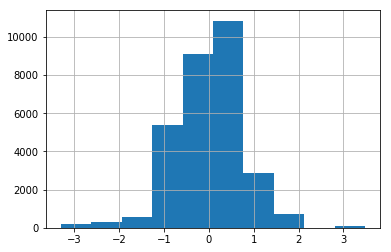

In [5]:
df['integralRo'].hist()

In [12]:
df['integral_mavg_30'] = df['integral'].rolling(window=30).mean()

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
size = 1000
# df[['price']].head(size).plot()
# df[['intg']].head(size).plot()
store = InfluxStore()
dfr = df[['time', 'integral', 'integral_mavg_30']]
dfr = dfr[dfr['integral'] != 0]
dfr.dropna(inplace=True)
store.storeDf(dfr, 'integral-class', 11)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [17]:
dfr

,time,integral
0,2018-01-01 17:01:00,0.022540
1,2018-01-01 17:02:00,0.022540
2,2018-01-01 17:03:00,0.022540
3,2018-01-01 17:04:00,0.022540
4,2018-01-01 17:05:00,0.022540
5,2018-01-01 17:06:00,-0.006645
6,2018-01-01 17:07:00,-0.006645
7,2018-01-01 17:08:00,-0.006645
8,2018-01-01 17:09:00,-0.006645
9,2018-01-01 17:10:00,-0.006645
